In [124]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import LinearNDInterpolator

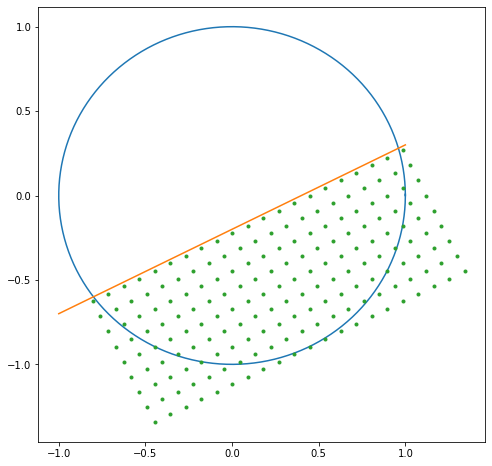

In [125]:
m = 0.5
c = -0.2

plt.figure(figsize=(8,8))
dx = 0.1
xx,zz = np.meshgrid(np.arange(-1.0,1.0+dx,dx),np.arange(-1,dx-0.2,dx))

pi = 3.14159
dtheta = 0.01
theta = np.arange(0,pi*2+dtheta,dtheta)
xcircle = np.cos(theta)
zcircle = np.sin(theta)
plt.plot(xcircle,zcircle)
x = np.arange(-1,1+0.01,0.01)
m = 0.5
c = -0.2
y = m*x + c
plt.plot(x,y)

#mapping square grid:
theta = np.arctan(m) 
xxn = xx*np.cos(theta) - zz*np.sin(theta)
zzn = xx*np.sin(theta) + zz*np.cos(theta)



plt.plot(xxn.flatten(),zzn.flatten(),'.')

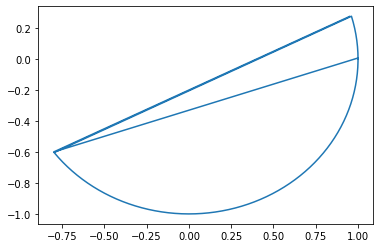

In [126]:
Xline = np.stack((x,y),axis=1)
Xcircle = np.stack((xcircle,zcircle),axis=1)
f = zcircle - m*xcircle -c 
#plt.tricontourf(X[:,0],X[:,1],f)
#finding points that lie below the line:

Xcircle = Xcircle[f<0]

f = y**2 + x**2 - 1 
Xline = Xline[f<=0]

Xsemicircle = np.concatenate((Xcircle,Xline),axis=0)
plt.plot(Xsemicircle[:,0],Xsemicircle[:,1])

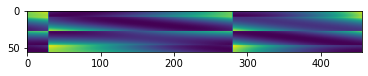

In [127]:
#creating a vector of all edge points on the cartesian grid:

xx = xxn+0
zz = zzn+0
X0 = np.stack((xx[:,0],zz[:,0]),axis=1)
X1 = np.stack((xx[0,1:-1],zz[0,1:-1]),axis=1)
X2 = np.stack((xx[-1,1:-1],zz[-1,1:-1]),axis=1)
X3 = np.stack((xx[:,-1],zz[:,-1]),axis=1)

#combining
Xexterior = np.concatenate((X0,X1,X2,X3),axis=0)

#squared distance between Xexterior and Xsemicircle

r2 = (Xexterior[:,0:1]-Xsemicircle[:,0:1].transpose())**2 + (Xexterior[:,1:2]-Xsemicircle[:,1:2].transpose())**2
#finding nearest point on semi circle to the edge of the square grid:

nearest_point = np.argmin(r2,axis=1)



plt.imshow(r2)

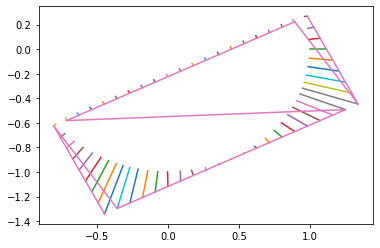

In [128]:
for i in range(0,Xexterior.shape[0]):
    plt.plot([Xexterior[i,0],Xsemicircle[nearest_point[i],0]],[Xexterior[i,1],Xsemicircle[nearest_point[i],1]])

plt.plot(Xexterior[:,0],Xexterior[:,1])

interpx = LinearNDInterpolator(Xexterior, Xsemicircle[nearest_point,0])
interpz = LinearNDInterpolator(Xexterior, Xsemicircle[nearest_point,1])




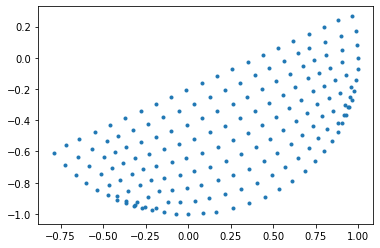

In [129]:
X = np.stack((xx.flatten(),zz.flatten()),axis=1)

Xtest = X*0
Xtest[:,0] = interpx(X)
Xtest[:,1] = interpz(X)
plt.plot(Xtest[:,0],Xtest[:,1],'.')

#for i in range(0,X.shape[0]):
    #plt.plot([X[i,0],Xtest[i,0]], [X[i,1],Xtest[i,1]]  )
